# 目的
- pascal VOC形式のxmlファイルで作ったアノテーションデータをnumpy.arrayに変換する
- データ元はjpeg画像とlabelImgで作ったアノテーションデータ(xmlファイル)
    - https://github.com/tzutalin/labelImg

## required
- xmltodict
```
$ pip install xmltodict
```


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import glob
import os
import cv2
from PIL import Image

import xmltodict

In [2]:
import create_bbox_data as bbox

# Global Variables

In [3]:
classes_file = 'data/classes.txt'
data_dir = 'data/res_images'

# カテゴリ
- 分類対象のクラスリスト
- 1行にクラス名称が書かれたテキストファイルを読む

In [4]:
classes = bbox.getClasses(classes_file)
print(classes)

['choco-ball', 'choco-package']


# BBoxデータセットを作る

In [5]:
## データセット作成
imgs, bboxs, obj_ids = bbox.getBBoxDataSet(data_dir=data_dir, classes=classes)

## save
np.save(os.path.join(data_dir, 'images.npy'), imgs)
np.save(os.path.join(data_dir, 'bounding_box_data.npy'), bboxs)
np.save(os.path.join(data_dir, 'object_ids.npy'), obj_ids)

In [6]:
print(imgs.shape)
print(len(bboxs))
print(len(obj_ids))

(22, 3, 302, 402)
22
22


# ChainerCVを使ってデータの確認
- アノテーションデータの確認

In [7]:
from chainercv.chainer_experimental.datasets.sliceable import TupleDataset
from chainercv.visualizations import vis_bbox

/home/tokita/.pyenv/versions/anaconda2-4.4.0/envs/py3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
dataset = TupleDataset(('img', imgs), ('bbox', bboxs), ('label', obj_ids))

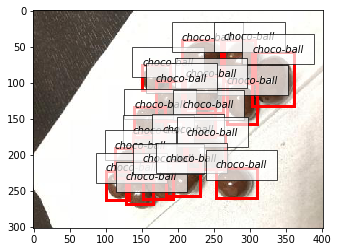

In [9]:
tmp_img, tmp_bboxs, tmp_labels = dataset[0]
vis_bbox(tmp_img, tmp_bboxs, tmp_labels, label_names=classes)
plt.show()